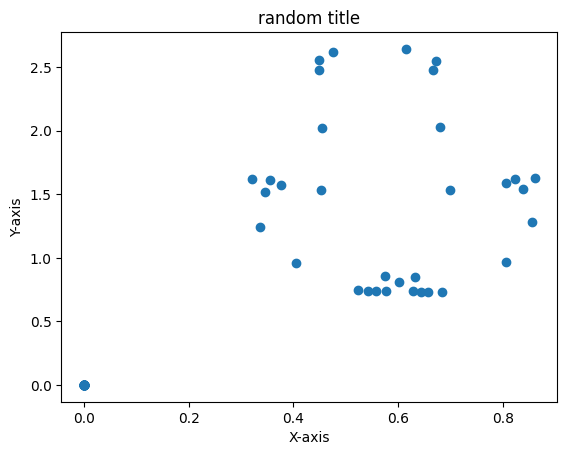

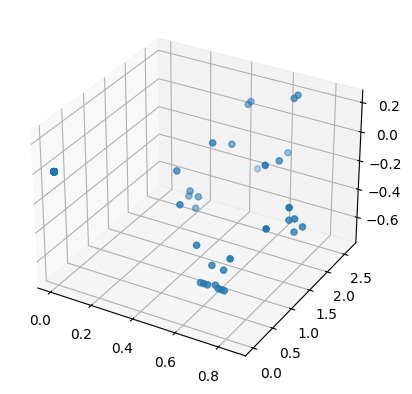

In [3]:
%run data_visualization.ipynb
import statistics
import math
import numpy as np

In [4]:
#function returns new x coordinates based on point de fuite chosen
    #!this formula is for point de fuite centered at 0
def projective_geometry(pt_fuite, corrected_x,y):
    new_x = []
    for i in range(len(y)):
        val=corrected_x[i]*(y[i]-pt_fuite[1])/(-1*pt_fuite[1])
        new_x.append(val)

    return new_x

In [5]:
def projective_geometry_not_centered(pt_fuite, corrected_x,y):
    ax = pt_fuite[0]
    by = pt_fuite[1]

    new_x = []
    for i in range(len(y)):
        slope = -by/(corrected_x[i]-ax)
        x_coord = (y[i]-by*(1+(ax/(corrected_x[i]-ax))))/(slope)
        new_x.append(x_coord)
    return new_x

In [6]:
# def correcting_x(x):
#     correction = find_center(x)
#     # print("The value of the correction is:", correction)
#     corrected_x = []
#     for i in x:
#         corrected_x.append(i-correction)
#         # print(i)
#         # print(i-correction)
#     return corrected_x

In [7]:
#loading my data using the function in the previous file
x = load_data("init_demo.csv")[0]
y = load_data("init_demo.csv")[1]
z = load_data("init_demo.csv")[2]
print(x)
print(y)

[0.601320207118988, 0.627795398235321, 0.642652153968811, 0.657174289226532, 0.5757715702056885, 0.5580477714538574, 0.5427073240280151, 0.6826934814453125, 0.5233935713768005, 0.6312943696975708, 0.5743553042411804, 0.8055953979492188, 0.4044441282749176, 0.8546903729438782, 0.3352086544036865, 0.8368879556655884, 0.3458381593227386, 0.8602175712585449, 0.3213260173797607, 0.8231231570243835, 0.3560941517353058, 0.8045650720596313, 0.3762905895709991, 0.6982381939888, 0.4516806006431579, 0.6788106560707092, 0.4539255499839782, 0.666111946105957, 0.4495510458946228, 0.6714625954627991, 0.4485352635383606, 0.6151371002197266, 0.4747433662414551, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.8066442012786865, 0.7376369833946228, 0.7344911098480225, 0.7314409613609314, 0.7427778840065002, 0.7417225241661072, 0.7403809428215027, 0.734893798828125, 0.7443556189537048, 0.8519324064254761, 0.8607808947563171, 0

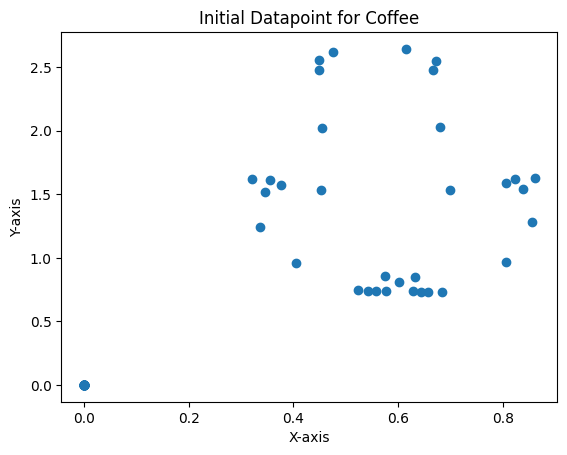

[0, -2]


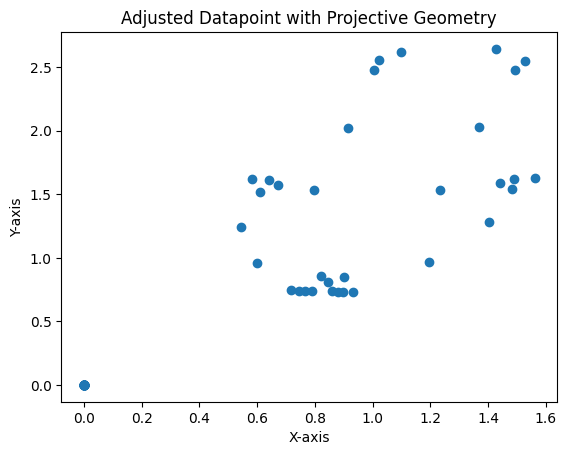

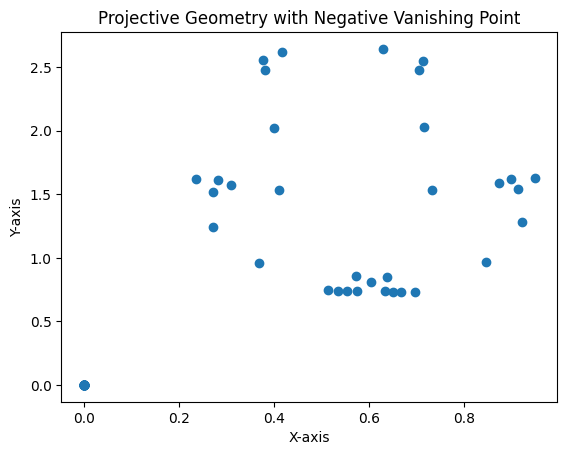

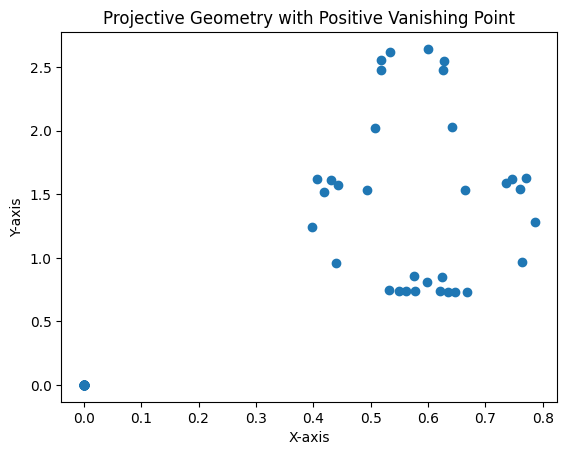

In [8]:
#x,y of point de fuite

points = [[x[i], y[i]] for i in range(len(y))]

#initial
scatter_2d(x,y, title = "Initial Datapoint for Coffee")

#changed
pt_fuite = [0,-2]
new_x = projective_geometry(pt_fuite, x, y)
print(pt_fuite)
scatter_2d(new_x, y, title = "Adjusted Datapoint with Projective Geometry")

#changed, with not centered point de fuite
pt_fuite = [find_center(x), -5]
new_x = projective_geometry_not_centered(pt_fuite, x, y)
scatter_2d(new_x, y, title = "Projective Geometry with Negative Vanishing Point")

#with point de fuite on the top
pt_fuite = [find_center(x),5]
new_x = projective_geometry_not_centered(pt_fuite, x, y)
scatter_2d(new_x, y, title = "Projective Geometry with Positive Vanishing Point")




In [9]:
#creating a function so that Aly is happy.

#the y coordinate of the point de fuite should be between [-5,-1] U [3,8]
def xinlei_vinci(file_name, negativity = False):
    if(negativity == True):
        y_vanishing_point = np.random.uniform(-15, -5)
    else:
        y_vanishing_point = np.random.uniform(5,15)
    
    df = pd.read_csv(file_name)
    df.head()

    #setting the header of the new file, as the previous file
    new_df=df
    
    
    print("HI")
    new_df.head()
    single_row = []
    #iterate through every row
    for row in range(len(df.index)):
        #finding the mean
        mean_x = []
        for col in df :
            if(col[0] == 'x'):
                mean_x.append(df[col].iloc[row])
        ax = np.mean(mean_x)

        #iterate through every column of the row, and transform it
        for col in df:
            #if the column is y, I know I have to apply the transformation to x!
            single_row.append(df[col].iloc[row])
            corrected_x = single_row[len(single_row)-2]
            if(col[0]=='y'):
                by = y_vanishing_point

                slope = -by/(corrected_x-ax)
                x_coord = (single_row[-1]-by*(1+(ax/(corrected_x-ax))))/(slope)
                single_row[len(single_row)-2] = x_coord

        #append the row into the pandas dataframe
        new_df.loc[row] = single_row
        single_row = []

    new_file_name = file_name+'_projective_geo_'+str(int(abs(y_vanishing_point)))+'_'+str(negativity)+'.csv'
    new_df.to_csv(new_file_name, index=False)
                
            
            

        

    


In [10]:
#testing
xinlei_vinci("new_files/coffee_test.csv", negativity = False )

HI
